In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('dataset/lab2_1_data.csv', header=None)

# transpose the data 
df = df.T
df.head()
data = df.values
data.shape

(100, 2)

[[ 1.         -0.79945262]
 [-0.79945262  1.        ]]
[1.79945262 0.20054738]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Text(0, 0.5, 'X2')

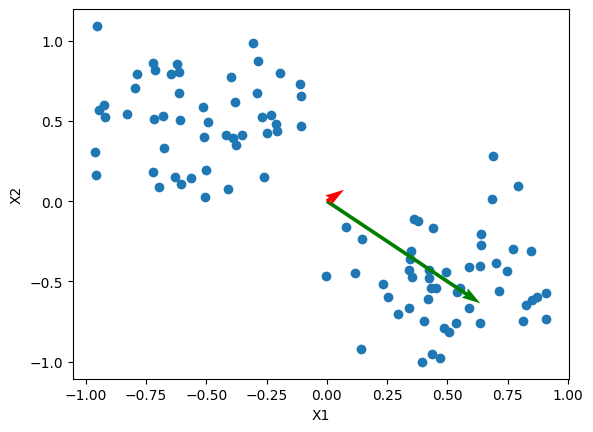

In [49]:
# correlation matrix
corr = np.corrcoef(data.T)
print(corr)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(corr)
print(eig_vals)
print(eig_vecs)
# plot the data
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, eig_vecs[0,0]* eig_vals[0], eig_vecs[1,0]* eig_vals[0], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, eig_vecs[0,1]*eig_vals[1], eig_vecs[1,1]*eig_vals[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
plt.xlabel('X1')
plt.ylabel('X2')



In [ ]:
w = np.random.rand(1, 2) # weight vector

In [27]:
class Hebbian:
    def __init__(self, dim) -> None:
        self.w = (np.random.rand(1, dim) - 0.5) * 2 # weight vector
        

    def train(self, data):
        # empty, must be implemented in subclass
        print("train method not implemented")
        
    def predict(self, data):
        return np.dot(data, self.w.T)

In [28]:
class BasicHebbian(Hebbian):

    def __init__(self, dim) -> None:
        super().__init__(dim)

    def train(self, data, eta, n_epochs):
        # shuffle the data
        np.random.shuffle(data)
        for epoch in range(n_epochs):
            for u in data:
                v = np.dot(self.w, u.T)
                self.w += eta*(u * v)
        


In [29]:
hebbian_net = BasicHebbian(2)
hebbian_net.train(data, 0.1, 100)


In [31]:
hebbian_net.predict(data)

array([[ 3.09629747e+243],
       [ 5.26869278e+243],
       [-4.41875430e+243],
       [-5.30628401e+243],
       [ 4.13087750e+243],
       [-2.88832122e+243],
       [-3.68502430e+243],
       [ 5.46957007e+243],
       [ 4.96105926e+243],
       [ 1.43226684e+243],
       [ 2.47095166e+243],
       [ 3.71746572e+243],
       [ 4.68203178e+243],
       [-3.20625039e+243],
       [ 5.45656624e+243],
       [-3.72913370e+243],
       [ 5.48531561e+243],
       [-4.87686325e+243],
       [-2.86269066e+243],
       [ 3.64017629e+243],
       [ 3.38688151e+243],
       [-2.51051622e+243],
       [-2.17573955e+243],
       [ 2.54049502e+243],
       [ 1.73150118e+243],
       [-2.61406739e+243],
       [ 3.21311164e+243],
       [ 2.81587225e+243],
       [ 5.45926643e+243],
       [-3.62762622e+243],
       [-5.91530135e+243],
       [-5.62934567e+243],
       [-2.87590133e+243],
       [-3.34508757e+243],
       [ 4.09051030e+243],
       [-4.68603633e+243],
       [ 4.79638919e+243],
 

[[ 1.         -0.79945262]
 [-0.79945262  1.        ]]


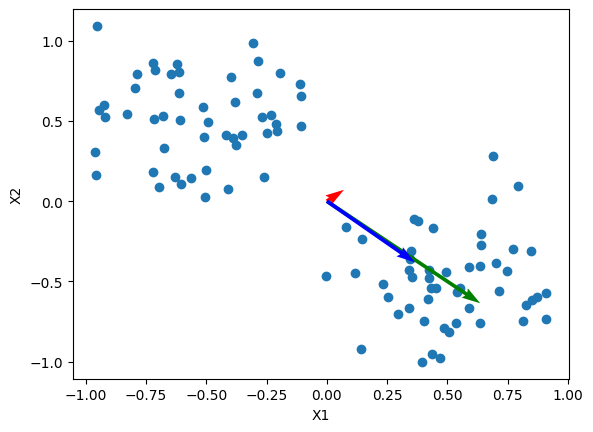

In [58]:
# correlation matrix
corr = np.corrcoef(data.T)
print(corr)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(corr)
# plot the data
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, eig_vecs[0,0]* eig_vals[0], eig_vecs[1,0]* eig_vals[0], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, eig_vecs[0,1]*eig_vals[1], eig_vecs[1,1]*eig_vals[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
plt.xlabel('X1')
plt.ylabel('X2')

# plot the weight vector
plt.quiver(0, 0, hebbian_net.w[0,0], hebbian_net.w[0,1], scale=1e244, scale_units='xy', angles='xy', color='b')


In [ ]:
class OjaHebbian(Hebbian):

    def __init__(self, dim) -> None:
        super().__init__(dim)
        
    def train(self, data, n_epochs):
        # shuffle the data
        np.random.shuffle(data)
        for epoch in range(n_epochs):
            for u in data:
                v = np.dot(self.w, u.T)
                self.w += 0.1 * v * (u - v * self.w)